### Introduction

Here I'm testing code from the A2C algorithm. I'm following the code from 

https://github.com/germain-hug/Deep-RL-Keras/blob/master/A2C/

Note: I haven't implemented the temporal difference part yet. So, this is really just policy gradient with
a baseline state-value function (which I model with another, separate, neural net -- do other people do this? I must check).

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, -332.6674519596587)
(episode, score) = (100, -162.96334009742623)
(episode, score) = (150, -78.7383215477732)
(episode, score) = (200, -208.14705787114633)
(episode, score) = (250, -141.57553348084699)
(episode, score) = (300, -276.8634013919101)
(episode, score) = (350, -35.845396715704496)
(episode, score) = (400, -247.09415556017325)
(episode, score) = (450, -132.66588920103342)
(episode, score) = (500, -116.33693968676556)
(episode, score) = (550, -96.14383396124998)
(episode, score) = (600, -47.32808106058202)
(episode, score) = (650, -105.16622406934513)
(episode, score) = (700, -74.92816360114756)
(episode, score) = (750, -162.67307252216764)
(episode, score) = (800, -78.97662826277097)
(episode, score) = (850, -5.208014800803156)
(episode, score) = (900, -81.33239620632129)
(episode, score) = (950, -42.27687594121461)
(episode, score) = (1000, -34.4895638202

(episode, score) = (8950, 191.57938534700247)
(episode, score) = (9000, 235.30161486351844)
(episode, score) = (9050, 158.10493960689678)
(episode, score) = (9100, 198.9545247169145)
(episode, score) = (9150, 207.99717969512997)
(episode, score) = (9200, 127.43665880694738)
(episode, score) = (9250, 193.10216903870645)
(episode, score) = (9300, 203.19935123962256)
(episode, score) = (9350, 190.4386821887423)
(episode, score) = (9400, -52.1883146466082)
(episode, score) = (9450, 187.93724402141845)
(episode, score) = (9500, 122.68649871595167)
(episode, score) = (9550, -23.879158967973808)
(episode, score) = (9600, 215.71187869640107)
(episode, score) = (9650, 224.66665668394091)
(episode, score) = (9700, 206.83821329754682)
(episode, score) = (9750, 243.1430204436006)
(episode, score) = (9800, 206.36762643398853)
(episode, score) = (9850, 206.73179422093216)
(episode, score) = (9900, 229.7310396552573)
(episode, score) = (9950, 173.8838951578781)
(episode, score) = (10000, 170.54239180

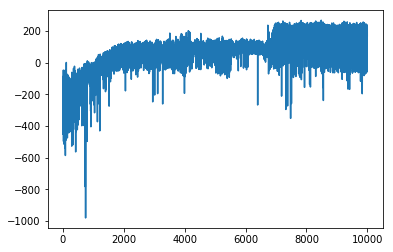

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent_with_baseline import Agent
from keras.utils import to_categorical
%matplotlib inline

#Env
env = gym.make('LunarLander-v2')
#env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

lr, gamma = 0.001, 0.99
agent = Agent(num_states, num_actions, lr, gamma)

#Train
scores = []
EPISODES = 10**4
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    done = False
    while not done:
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward)
        state = next_state
        if done:
            break
    
    #Learn & print results
    agent.train_models()
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
np.savetxt('stats/scores_lunar_landing.txt',scores)

Must compare to regular policy gradient


### Compare to regular policy gradients

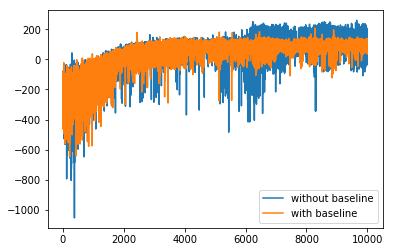

In [5]:
#I computed the scores for the regular policy gradient in the, well, 'policy-gradient' foldee ;P
filename = '/home/kokeeffe/research/robocab/RL_practice/policy_gradients/stats/scores_lunar_landing.txt'
scores_regular = np.loadtxt(filename)
plt.plot(scores_regular)
plt.plot(scores)
plt.legend(['without baseline','with baseline'])

Looks good -- there is indeed smaller variance.

### Watch a smart agent

In [8]:
state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    agent.remember(state[0], action, reward)
    state = next_state
env.close()